#### Ingeniero en Sistemas: Erick J. Pineda Amézquita  
Correo de contacto: epineda.amezquita@gmail.com  
github: https://github.com/epinedaWorks/

Ejercicios basados en el curso de DataCamp  
https://campus.datacamp.com/courses/image-processing-in-python/introducing-image-processing-and-scikit-image?ex=6

# Procesamiento de imagenes

Para los siguientes ejemplos, se va a utilizar la herramienta de SCIKIT IMAGE.  
Se requiere instalar dicha librería para hacer uso de todas las funciones que provee la herramienta.  
Para instalar en Windows se requiere acceder a la consola de comandos en modo Administrador y ejecutar la siguiente instrucción:  


**$ pip install scikit-image**  

Si no funciona, probar con:   

**$ conda install -c conda-forge scikit-image**  

No esta de mas realizar un test de los paquetes que se requieren, ya sea antes o después de la instalación de scikit-image por medio de las siguientes instrucciones:  

**$ pytest --pyargs skimage**

Fuente:  
https://scikit-image.org/docs/stable/install.html

# Ejemplo 1, Transformar a gris

Comenzamos por importar la librería, si la siguiente instrucción muestra error, será necesario revisar la instalación de scikit image.

In [1]:
# Import the modules from skimage
from skimage import data, color

import matplotlib.pyplot as plt
import numpy as np


Se crea un metodo que va a leer las imagenes por medio de matplotlib.

In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

    

Se importan imagenes que trae la librería y se aplican conversiones de color.

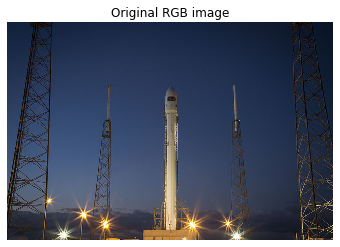

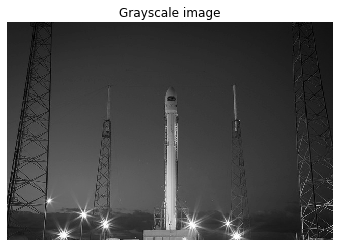

In [3]:
# Load the rocket image
rocket = data.rocket()

# Convert the image to grayscale
gray_scaled_rocket = color.rgb2gray(rocket)

# Show the original image
show_image(rocket, 'Original RGB image')

# Show the grayscale image
show_image(gray_scaled_rocket, 'Grayscale image')

# Rotar una imagen

Imagen Normal:


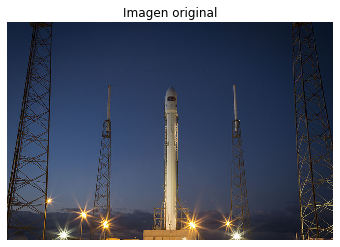

Rotacion de imagen en forma vertical:


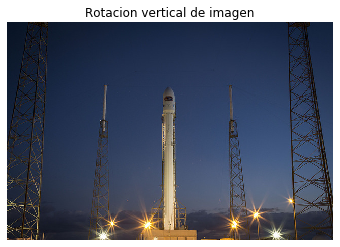

Rotacion de imagen en forma horizontal:


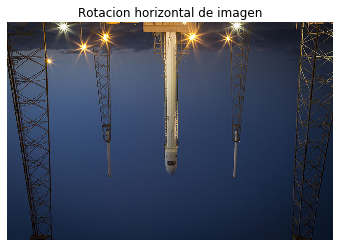

In [4]:
#Imagen normal:

print("Imagen Normal:")
show_image(rocket, "Imagen original")

print("Rotacion de imagen en forma vertical:")
imgRotacionVertical= np.fliplr(rocket)
show_image(imgRotacionVertical, 'Rotacion vertical de imagen')

print("Rotacion de imagen en forma horizontal:")
imgRotacionHorizontal= np.flipud(rocket)
show_image(imgRotacionHorizontal, 'Rotacion horizontal de imagen')




# Histogramas
Gráfico de la representación de distribuciones de frecuencias, en el que se emplean rectángulos dentro de unas coordenadas.  

 <pre>    0 -------------------------------------------------------------- 255
+Negro por lo tanto -blanco                               +Blanco por lo tanto -negro

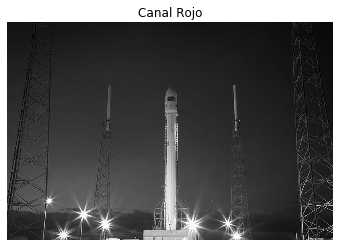

Histograma del canal Rojo


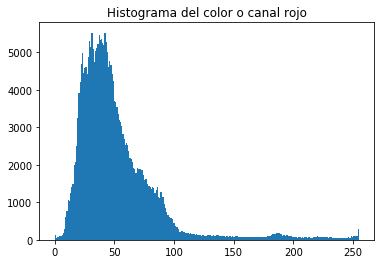

In [5]:
# Obtain the red channel
red_channel = rocket[:, :, 0]
show_image(red_channel, "Canal Rojo")

print("Histograma del canal Rojo")
# Plot the red histogram with bins in a range of 256
plt.hist(red_channel.ravel(), bins=256)

# Set title and show
plt.title('Histograma del color o canal rojo')
plt.show()



# Thresholding - Umbrales / Binarización 
Es una técnica que a partir de una imagen original o imagen origen, crea otras imagenes en tonos grises para un canal determinado, dicha tonalidad dependerá de un valor de umbral (el valor "thresh") para convertir dicho canal a blanco y negro.  
Se usa para separar las areas de una imagen o segmentar lo que está en el fondo o lo que está en frente.  
Se utiliza en:  
+ Aislamiento de objetos.
+ Detección de objetos.
+ Detección de rostros.
+ etc.


In [6]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu
from skimage import color 
import cv2

imgName = "guitarrista.JPG"    
imgGuitarrista = cv2.imread(imgName)
#cv2.imshow('Hello, my Imagen from Python ', img)



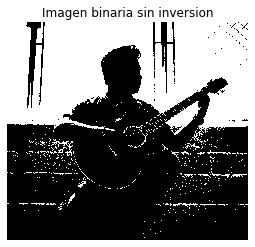

In [7]:
# Make the image grayscale using rgb2gray
imgGuitarristaToGray = color.rgb2gray(imgGuitarrista)

# Obtain the optimal threshold value with otsu
ValorThresh = threshold_otsu(imgGuitarristaToGray)

# Apply thresholding to the image
binary = imgGuitarristaToGray > ValorThresh

# Show the image
show_image(binary, 'Imagen binaria sin inversion')

Aplicando inversión a través del valor Thresh 

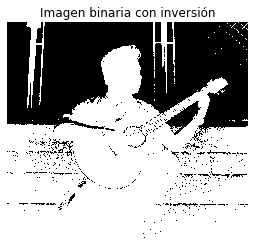

In [8]:
binary = imgGuitarristaToGray < ValorThresh

# Show the image
show_image(binary, 'Imagen binaria con inversión')

# Probando otros filtros

NameError: name 'show_plot' is not defined

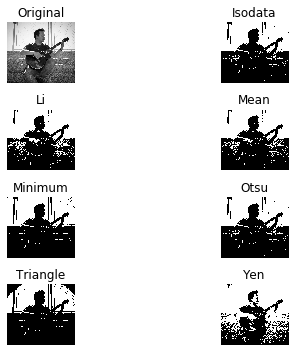

In [59]:
from skimage.filters import try_all_threshold


imgName = "guitarrista.JPG"    
imgGuitarrista = cv2.imread(imgName)
imgGuitarristaToGray = color.rgb2gray(imgGuitarrista)

# Obtain all the resulting images
fig, ax = try_all_threshold(imgGuitarristaToGray, verbose=False)
# Showing resulting plots
show_plot(fig, ax)


# Utilizar el valor Thresh para resaltar objetos de fondo o de enfrente

Los ejemplos anteriores utilizan un algoritmo desconocido para hacer la binarización de imágenes.
Para el caso que se desee hacer visible objetos del fondo o de enfrente de una forma sencilla, no tan elaborada y de forma práctica, se debe utilizar cualquiera de los metodos que existen segun las dos categorias siguientes para tener un mejor enfoque de "fondo" o de "frente":  
+ Global o de histograma
+ Local o adaptativo  
  
Los valores globales o basados en el histograma utilizan un valor del Thresh aplicado cuando el fondo es uniforme, en otras palabras, es funcional cuando el fondo es evidente.  
En casos mas complejos se recomienda usar un valor de Thresh adaptativo o local, para ello utiliza un tamaño de bloque.  
Tomar en cuenta que el valor de Thresh se puede invertir y que ambos métodos creen encontrar un valor óptimo.

  
**Ejemplo Global:**


Imagen original


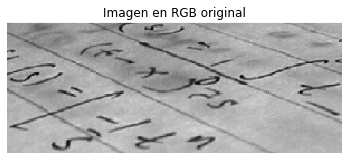

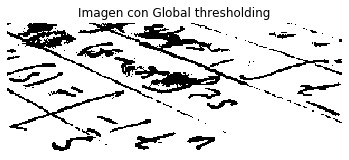

In [61]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

#imgPathNameGuitarrista = "guitarrista.jpg"    
imgPathNameGuitarrista = "texto.jpg"    
imgGuitarrista = cv2.imread(imgPathNameGuitarrista)
imgGuitarristaUnCanal = imgGuitarrista[:,:,2]


# Obtain the optimal otsu global thresh value
global_thresh = threshold_otsu(imgGuitarristaUnCanal)

# Obtain the binary image by applying global thresholding
binary_global = imgGuitarristaUnCanal > global_thresh

print("Imagen original")
show_image(imgGuitarrista, 'Imagen en RGB original')

# Show the binary image obtained
show_image(binary_global, 'Imagen con Global thresholding')

Ejemplo Local o adaptativo:

Imagen original


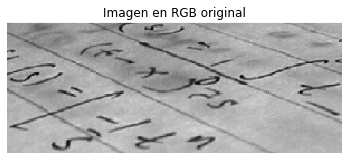

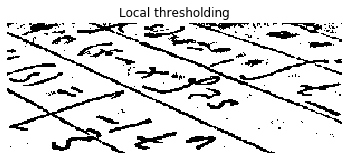

In [58]:
# Import the local threshold function
from skimage.filters import threshold_local

imgPathNameTexto = "texto.jpg"    
imgTexto = cv2.imread(imgPathNameTexto)
imgTextoUnCanal = imgTexto[:,:,2]

# Set the block size to 35
block_size = 35

# Obtain the optimal local thresholding
local_thresh = threshold_local(imgTextoUnCanal, block_size, offset=10)

# Obtain the binary image by applying local thresholding
binary_local = imgTextoUnCanal > local_thresh


binary_global = imgGuitarristaUnCanal > global_thresh

print("Imagen original")
show_image(imgTexto, 'Imagen en RGB original')
# Show the binary image obtained


# Show the binary image
show_image(binary_local, 'Local thresholding')